## EXERCISE 5
[0-7 points] Consider the dataset countries.csv : prepare a dimensionality reduction planar projection (using the method you rate as the most adequate), color the countries according to your preferred grouping and comment one or more facts emerging from the plot.

In [65]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap
import umap.umap_ as umap


%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [66]:
df = pd.read_csv('https://raw.githubusercontent.com/elissrigoni/DataViz/main/Text_12Jun20/countries.csv', decimal = ',')
df = df.dropna()
df

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,Venezuela,LATIN AMER. & CARIB,25730435,912050,28.2,0.31,-0.04,22.20,4800.0,93.4,140.1,2.95,0.92,96.13,2.0,18.71,4.92,0.040,0.419,0.541
219,Vietnam,ASIA (EX. NEAR EAST),84402966,329560,256.1,1.05,-0.45,25.95,2500.0,90.3,187.7,19.97,5.95,74.08,2.0,16.86,6.22,0.209,0.410,0.381
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


In [67]:
df = df.astype({'Climate':'int'})

In [72]:
# define x 
x = df[df.columns.difference((['Climate', 'Country', 'Region']))]
# define target variable: select last column
y = df.Climate.values
unique, counts = np.unique(y, return_counts=True)
classes = len(counts)
x

,Agriculture,Arable (%),Area (sq. mi.),Birthrate,Coastline (coast/area ratio),Crops (%),Deathrate,GDP ($ per capita),Industry,Infant mortality (per 1000 births),Literacy (%),Net migration,Other (%),Phones (per 1000),Pop. Density (per sq. mi.),Population,Service
0,0.380,12.13,647500,46.60,0.00,0.22,20.34,700.0,0.240,163.07,36.0,23.06,87.65,3.2,48.0,31056997,0.380
1,0.232,21.09,28748,15.11,1.26,4.42,5.22,4500.0,0.188,21.52,86.5,-4.93,74.49,71.2,124.6,3581655,0.579
2,0.101,3.22,2381740,17.14,0.04,0.25,4.61,6000.0,0.600,31.00,70.0,-0.39,96.53,78.1,13.8,32930091,0.298
6,0.040,0.00,102,14.17,59.80,0.00,5.34,8600.0,0.180,21.03,95.0,10.76,100.00,460.0,132.1,13477,0.780
7,0.038,18.18,443,16.93,34.54,4.55,5.37,11000.0,0.220,19.46,89.0,-6.15,77.27,549.9,156.0,69108,0.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,0.040,2.95,912050,18.71,0.31,0.92,4.92,4800.0,0.419,22.20,93.4,-0.04,96.13,140.1,28.2,25730435,0.541
219,0.209,19.97,329560,16.86,1.05,5.95,6.22,2500.0,0.410,25.95,90.3,-0.45,74.08,187.7,256.1,84402966,0.381
224,0.135,2.78,527970,42.89,0.36,0.24,8.30,800.0,0.472,61.50,50.2,0.00,96.98,37.2,40.6,21456188,0.393
225,0.220,7.08,752614,41.00,0.00,0.03,19.93,800.0,0.290,88.29,80.6,0.00,92.90,8.2,15.3,11502010,0.489


In [73]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [77]:
import umap
import umap.umap_ as umap
reducer = umap.UMAP(n_components = classes, n_neighbors = 30, min_dist = 0.3, random_state = 42)

In [78]:
embedding = reducer.fit_transform(x)

Text(0.5, 1.0, 'UMAP projection')

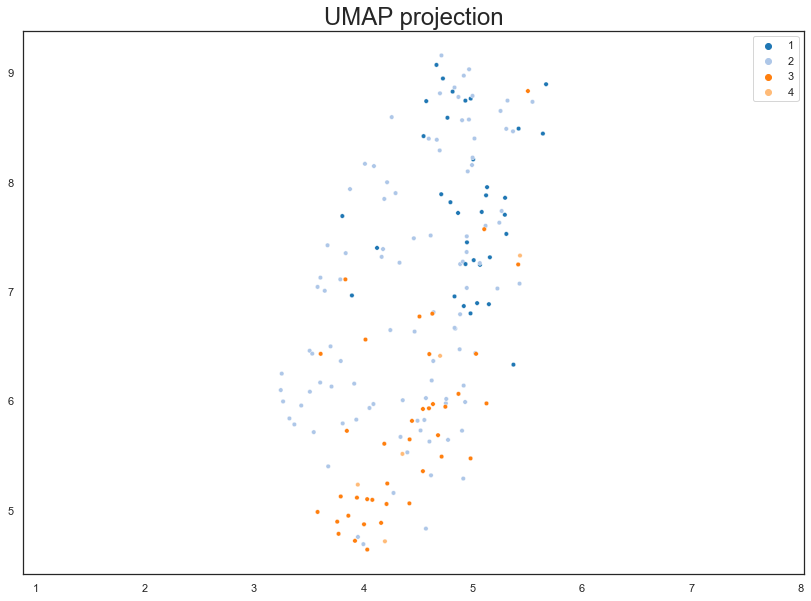

In [80]:
sns.scatterplot(x = embedding[:, 0], 
                y = embedding[:, 1], s = 20, hue = y, 
                palette = sns.color_palette('tab20', classes))

plt.gca().set_aspect('equal', 'datalim')
plt.legend(bbox_to_anchor = (1, 1))
plt.title('UMAP projection', fontsize=24)